# Introduction to Forecasting
In the previous section we fit various smoothing models to existing data. The purpose behind this is to predict what happens next.<br>
What's our best guess for next month's value? For the next six months?

In this section we'll look to extend our models into the future. First we'll divide known data into training and testing sets, and evaluate the performance of a trained model on known test data.

* Goals
  * Compare a Holt-Winters forecasted model to known data
  * Understand <em>stationarity</em>, <em>differencing</em> and <em>lagging</em>
  * Introduce ARIMA and describe next steps

### <font color=blue>Simple Exponential Smoothing / Simple Moving Average</font>
This is the simplest to forecast. $\hat{y}$ is equal to the most recent value in the dataset, and the forecast plot is simply a horizontal line extending from the most recent value.
### <font color=blue>Double Exponential Smoothing / Holt's Method</font>
This model takes trend into account. Here the forecast plot is still a straight line extending from the most recent value, but it has slope.
### <font color=blue>Triple Exponential Smoothing / Holt-Winters Method</font>
This model has (so far) the "best" looking forecast plot, as it takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

## Forecasting with the Holt-Winters Method
For this example we'll use the same airline_passengers dataset, and we'll split the data into 108 training records and 36 testing records. Then we'll evaluate the performance of the model.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


## Train Test Split

In [ ]:
train_data = df.iloc[:108] # Goes up to but not including 108
test_data = df.iloc[108:]

## Fitting the Model

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

## Evaluating Model against Test Set

In [ ]:
# YOU CAN SAFELY IGNORE WARNINGS HERE!
# THIS WILL NOT AFFECT YOUR FORECAST, IT'S JUST SOMETHING STATSMODELS NEEDS TO UPDATE UPON NEXT RELEASE.
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

In [ ]:
test_predictions

1958-01-01    348.204345
1958-02-01    341.572414
1958-03-01    397.790545
1958-04-01    388.670276
1958-05-01    391.783211
1958-06-01    451.357130
1958-07-01    502.150898
1958-08-01    498.397108
1958-09-01    439.422205
1958-10-01    383.519673
1958-11-01    336.907955
1958-12-01    381.282700
1959-01-01    392.159299
1959-02-01    384.690199
1959-03-01    448.004925
1959-04-01    437.733375
1959-05-01    441.239265
1959-06-01    508.333392
1959-07-01    565.539021
1959-08-01    561.311377
1959-09-01    494.891883
1959-10-01    431.932594
1959-11-01    379.436929
1959-12-01    429.413242
1960-01-01    441.662829
1960-02-01    433.250879
1960-03-01    504.558027
1960-04-01    492.989867
1960-05-01    496.938317
1960-06-01    572.501951
1960-07-01    636.928830
1960-08-01    632.167518
1960-09-01    557.363676
1960-10-01    486.456835
1960-11-01    427.334473
1960-12-01    483.619456
Freq: MS, Name: HW Forecast, dtype: float64

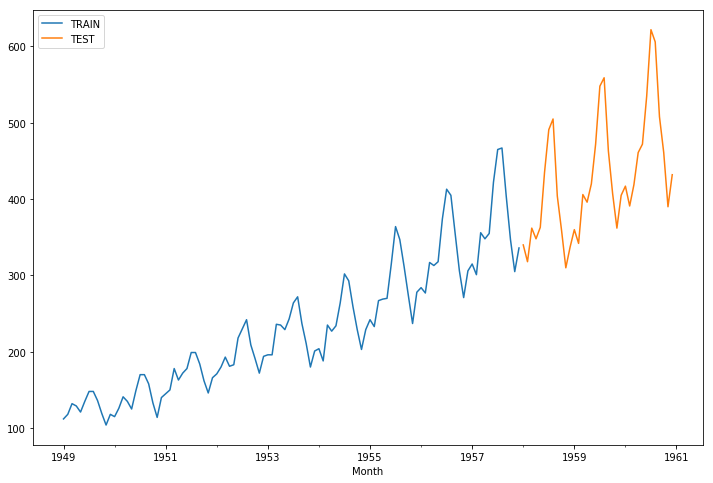

In [ ]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

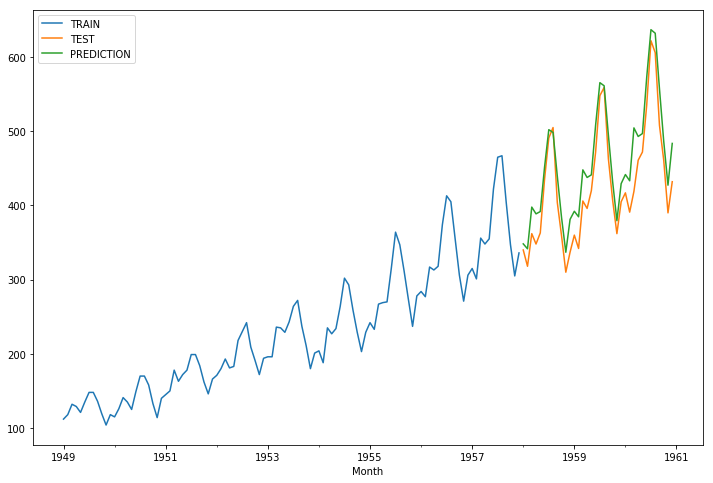

In [ ]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

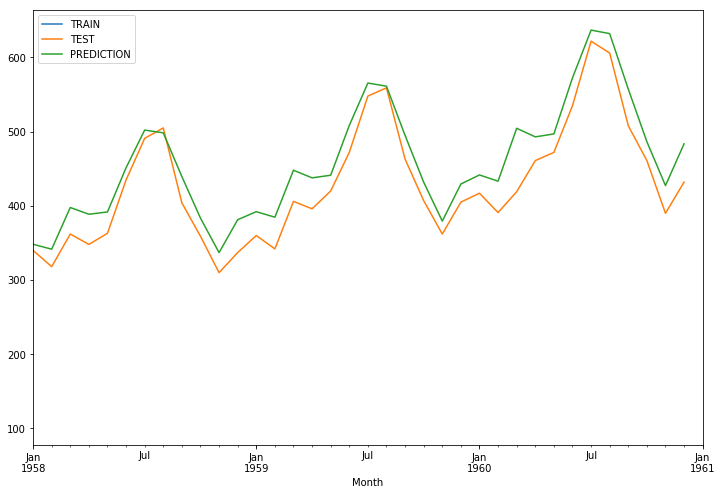

In [ ]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

## Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mean_absolute_error(test_data,test_predictions)

30.24228895401259

In [ ]:
mean_squared_error(test_data,test_predictions)

1143.4649378653387

In [ ]:
np.sqrt(mean_squared_error(test_data,test_predictions))

33.815158403670665

In [ ]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


## Forecasting into Future

In [ ]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [ ]:
forecast_predictions = final_model.forecast(36)

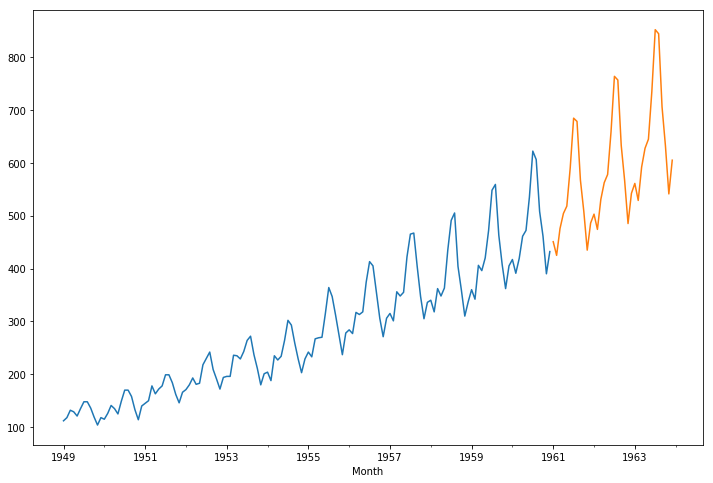

In [ ]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();